# Broker Dealer Series

We will propose a relevant and exhaustive market risk analysis of a Broker Dealer Raymond James Financial, Inc.

## 1. Import Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set(rc={"figure.figsize":(15, 8)},style="whitegrid")
plt.rcParams['font.family'] = 'serif'

## 2. Download the Data

In [2]:
# This is the ticker we choose to analyze
ticker = 'RJF'
# We use the function get_data to get the data from Yahoo Finance
prices = sf.get_data(ticker)

We compute the returns using the function get_returns from Series_Functions package.

In [3]:
returns = sf.get_returns(prices)

In [4]:
returns.head()

Date
2007-01-04 00:00:00-05:00   -0.003906
2007-01-05 00:00:00-05:00   -0.012091
2007-01-08 00:00:00-05:00    0.005623
2007-01-09 00:00:00-05:00    0.014145
2007-01-10 00:00:00-05:00    0.010056
Name: Close, dtype: float64

We plot the returns for the Broker Dealer using the function plot_returns.

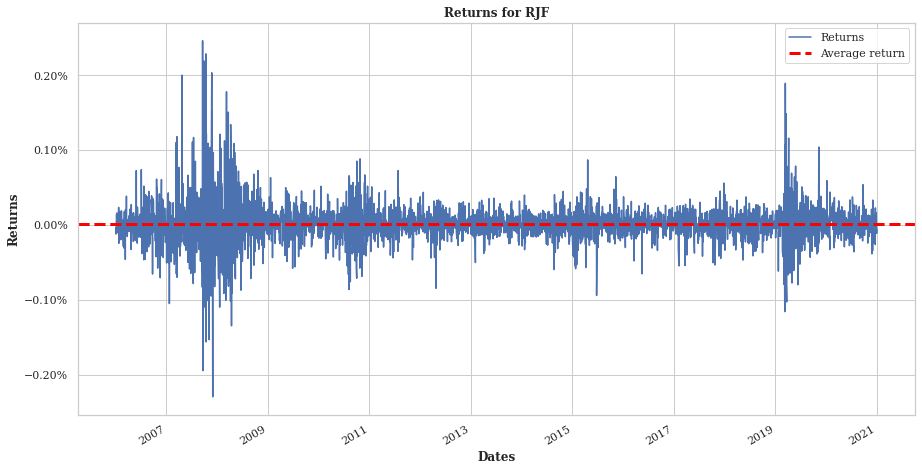

In [5]:
sf.plot_returns(returns, ticker)

## 3. Estimation of the VaR

### a. Non parametric method

We are computing the VaR using two methods, the first is a simple historical simulation method and the second is an age-weighted historical simulation. The difference between the two methods is the weight associate to the returns. In our case we associate these kind of weights:
$$
\omega_{i} = \frac{\lambda^{i-1}(1+\lambda)}{1+\lambda^{n}}
$$ 
for $i \in [1,n]$ where $n$ is the lenght of the period (The sum is equal to 1).

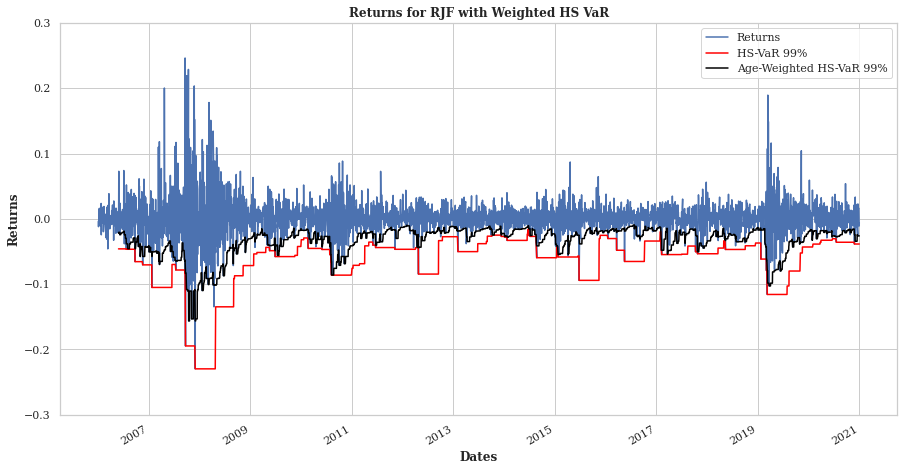

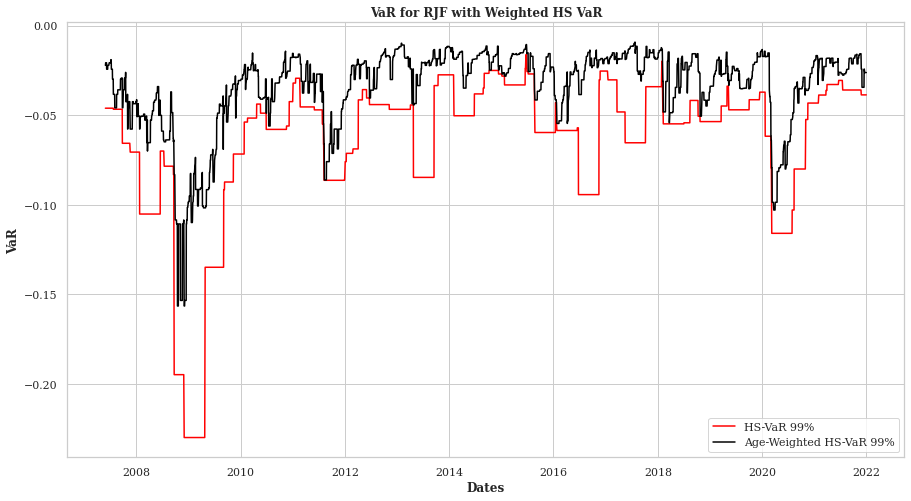

In [6]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=100,ticker=ticker)

If we are using a bigger window, the VaR will be more and more smoothed and constant.

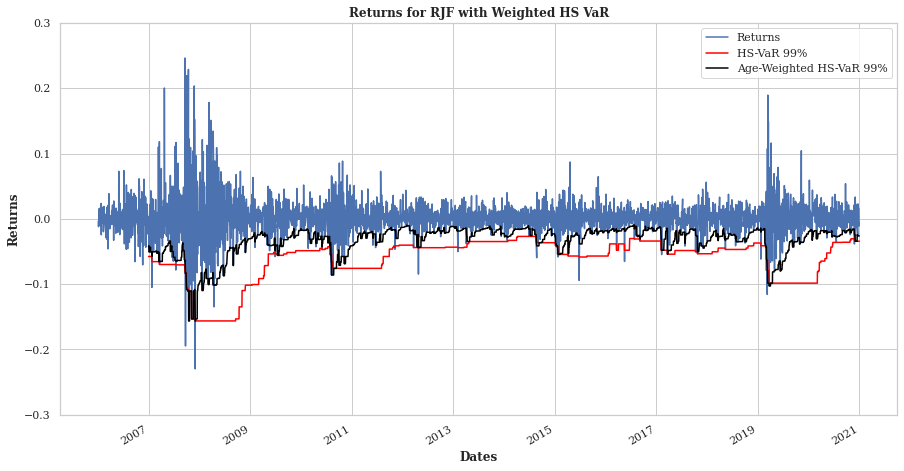

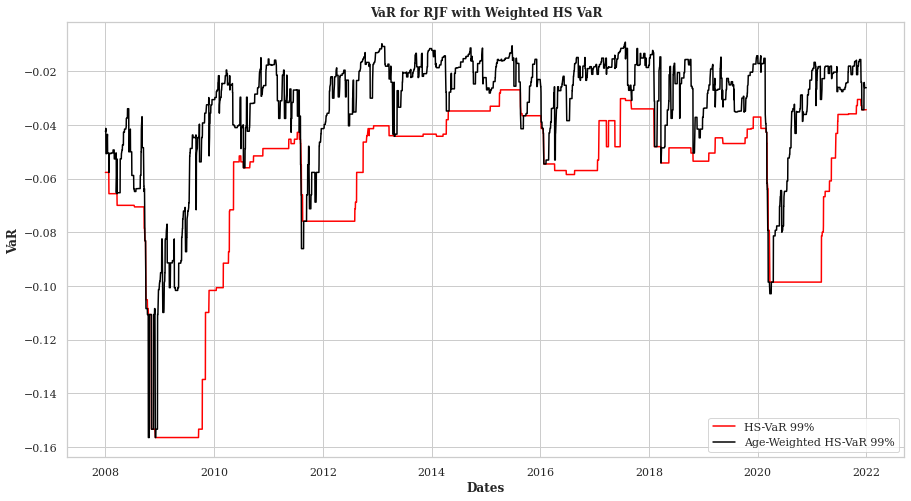

In [7]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=250,ticker=ticker)

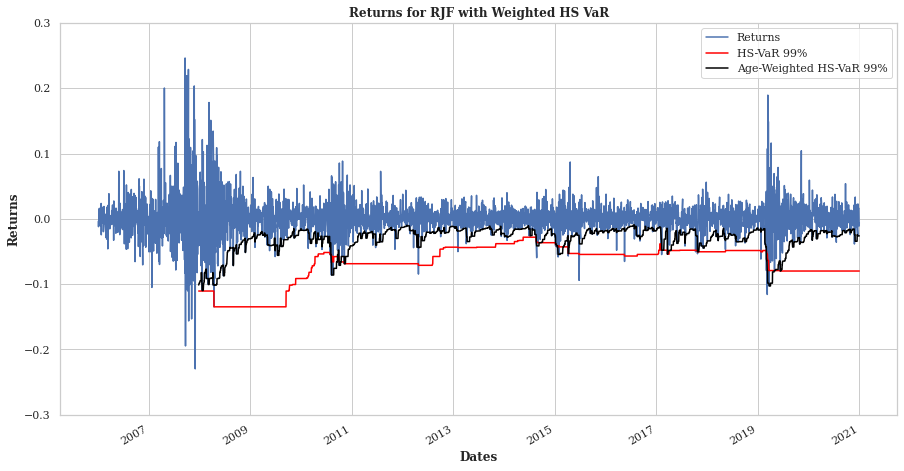

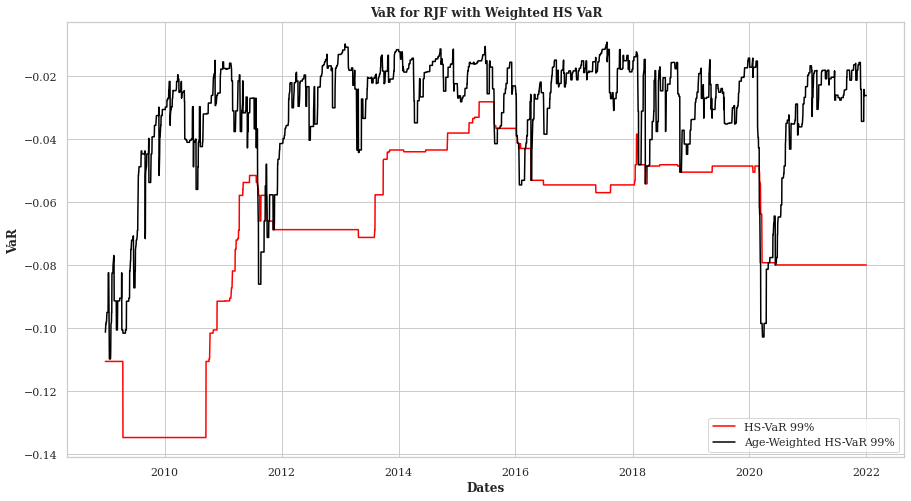

In [8]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=500,ticker=ticker)

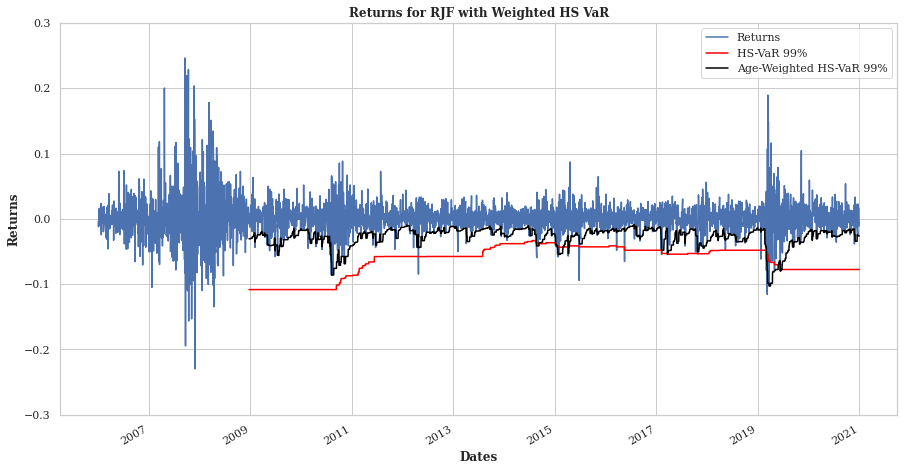

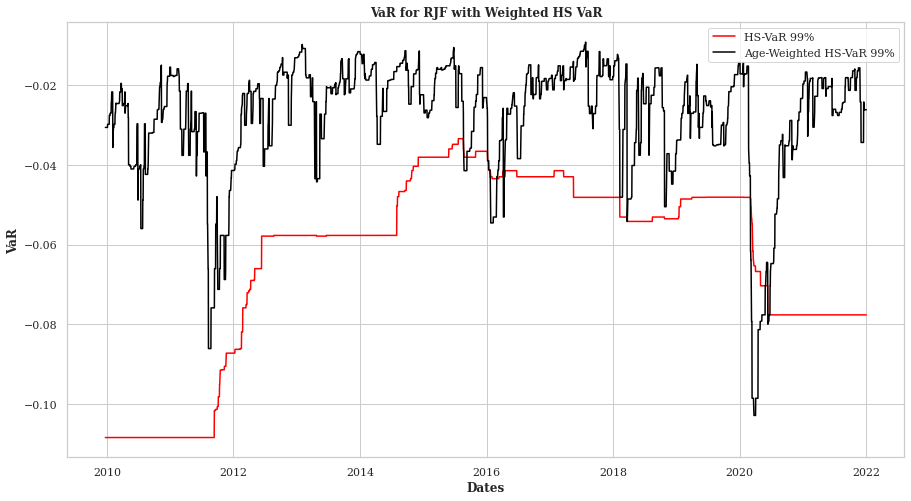

In [9]:
VaR_NonParam = sf.weighted_hs_var(returns=returns,confidence_level=99,window=750,ticker=ticker)

### b. Parametric method

After the Non parametric Method we are doing a parametric method and especially the GARCH model method. If we want to apply a parametric method like the GARCH model method it's important to verify some hypotesis like the stationarity of the returns over the selected period. This hypothesis can be verified by using the adfuller test. The null hypothesis says that the series has a unit root, and the alternative hypothesis says that the series is stationary. If the p-value is lower than 0.05 (threshold we decided to represent the 95% confidence level) we succeed to reject the null hypothesis so we suppose that the series is stationary on the considered period.

In [10]:
# Example of adf test on the whole period
p_value = sf.Dickey_Fuller(returns,ticker=ticker)

Augmented Dickey_fuller Statistic for RJF: -12.095951
p-value: 0.000000
Critical values at different levels:
	1%: -3.432
	5%: -2.862
	10%: -2.567


The p-value is lower than 0.05 so we can consider the stationarity of the series over the whole period.

/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004465. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004465. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/envs/cvxpy_env/lib/python3.9/si

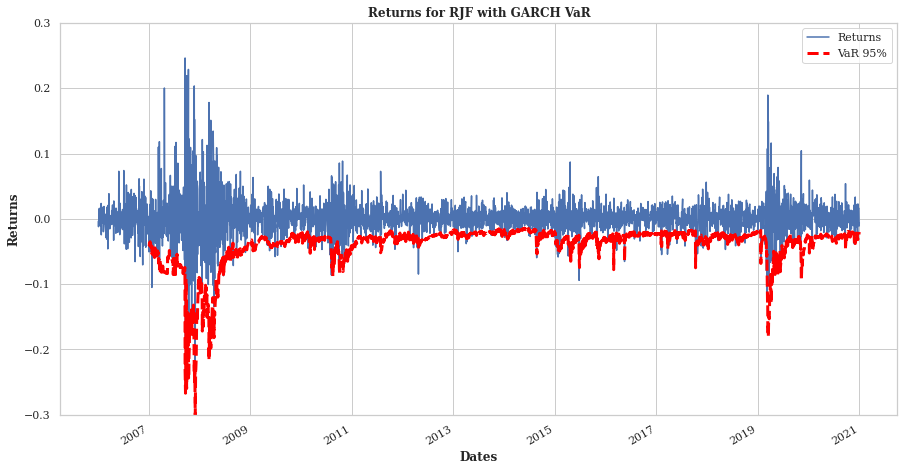

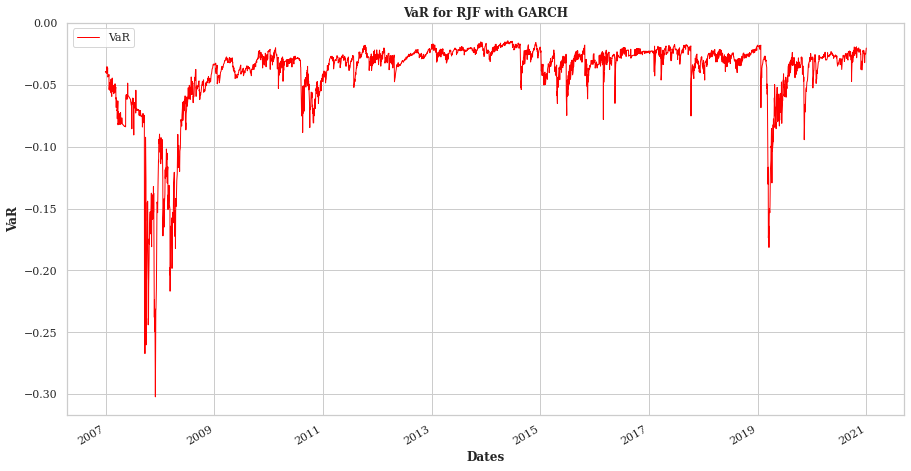

In [11]:
VaR_Param = sf.garch_var2(returns=returns,confidence_level=95,ticker=ticker)

## Expected shortfall

In [12]:
Es = sf.expected_shortfall(returns=returns, confidence_level=95, window=250, ticker=ticker)

ValueError: Can only compare identically-labeled Series objects